In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
data = pd.read_csv('winequality-red.csv',sep=';')
data.head()

C:\Users\YRJ\AppData\Local\Temp\ipykernel_87192\1135372156.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
#data.corr()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
data.shape

(1599, 12)

In [35]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in data['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
data['Reviews'] = reviews
#view final data
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Reviews'],
      dtype='object')

In [37]:
data['Reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [38]:
Counter(data['Reviews'])

Counter({'2': 1571, '3': 18, '1': 10})

In [39]:
x = data.iloc[:,:11]
y = data['Reviews']
x.head(10)#显示前10行

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [40]:

from sklearn.preprocessing import StandardScaler#标准化
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)


[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


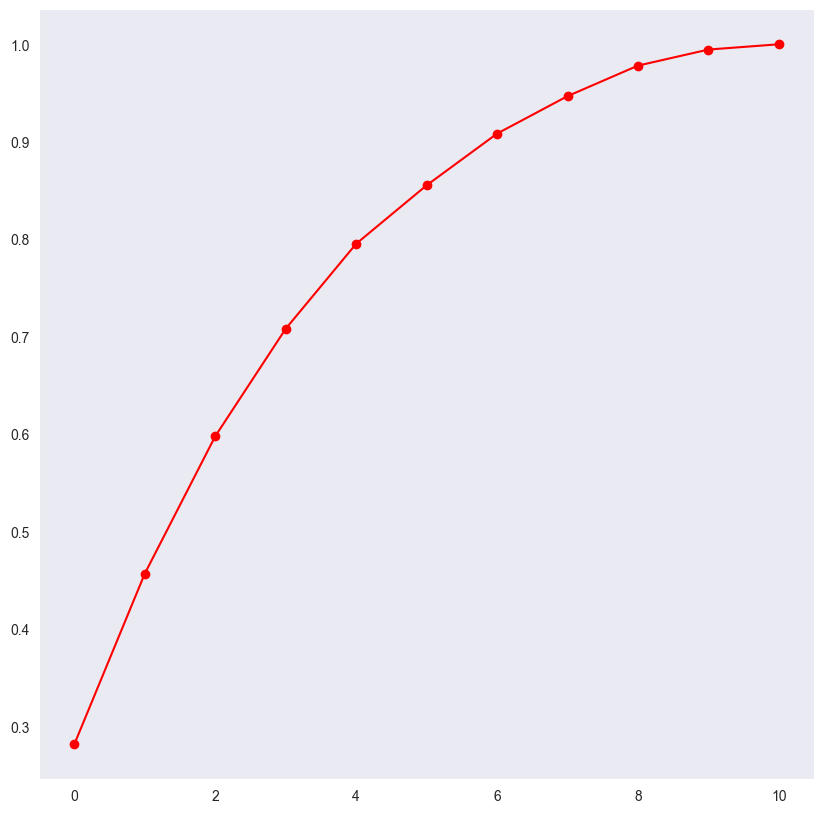

In [41]:
from sklearn.decomposition import PCA#主成分分析
pca = PCA()
x_pca = pca.fit_transform(x)
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')#解释参数:np.cumsum(pca.explained_variance_ratio_)累计方差贡献率
plt.grid()

In [42]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
print(x_new)

[[-1.61952988  0.45095009 -1.77445415 ... -0.91392069 -0.16104319
  -0.28225828]
 [-0.79916993  1.85655306 -0.91169017 ...  0.92971392 -1.00982858
   0.76258697]
 [-0.74847909  0.88203886 -1.17139423 ...  0.40147313 -0.53955348
   0.59794606]
 ...
 [-1.45612897  0.31174559  1.12423941 ... -0.50640956 -0.23108221
   0.07938219]
 [-2.27051793  0.97979111  0.62796456 ... -0.86040762 -0.32148695
  -0.46887589]
 [-0.42697475 -0.53669021  1.6289552  ... -0.49615364  1.18913227
   0.04217568]]


In [43]:
#split the data into train and test
%%script false
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1199, 8)
(400, 8)
(1199,)
(400,)


In [44]:
%%script false
import numpy as np

# 定义自定义函数 train_test_split 进行训练集和测试集划分
def train_test_split(X, y, test_size=0.25, random_state=None):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

# 定义自定义函数 LogisticRegression 进行 Logistic 回归训练和预测
class LogisticRegression:
    def __init__(self, lr=0.1, num_iterations=3000):
        self.lr = lr
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)#np.ones((m, 1))创建一个m行1列的矩阵，np.concatenate((np.ones((m, 1)), X), axis=1)将两个矩阵进行拼接
        self.theta = np.zeros(n + 1)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.lr * gradient

    def predict(self, X):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        y_pred = np.round(h)
        return y_pred

# 加载数据集，这里假设 x_new 和 y 已经加载好了
# 将 y 转换为数字类型
y = y.astype(float)
# 使用自定义函数 train_test_split 进行训练集和测试集划分
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# 创建 LogisticRegression 对象
lr = LogisticRegression()

# 在训练集上训练 Logistic 回归模型
lr.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = lr.predict(x_test)

# 计算准确率
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

(1200, 8)
(399, 8)
(1200,)
(399,)
0.005012531328320802


In [45]:
#Logistic Regression
%%script false
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict = lr.predict(x_test)
accuracy = lr.score(x_test,y_test)
print(accuracy*100)
#计算准确率
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

98.24561403508771
[[  0   2   0]
 [  0 392   0]
 [  0   5   0]]
98.24561403508771


In [14]:
#重新定义LogisticRegression  
%%script false
def loadDataSet():
    dataMAT = []; labelMAT = []
    fr = open('winequality-red.csv')
    for line in fr.readlines():
        lineArr = line.strip().split(';')
        dataMAT.append([float(lineArr[0]), float(lineArr[1]), float(lineArr[2]), float(lineArr[3]), float(lineArr[4]), float(lineArr[5]), float(lineArr[6]), float(lineArr[7]), float(lineArr[8]), float(lineArr[9]), float(lineArr[10])])#可能不添加最后两个特征
        labelMAT.append(float(lineArr[11]))
    return dataMAT,labelMAT

def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def gradAscent(dataMAT, labelMAT):#梯度上升
    dataMatrix = np.mat(dataMAT)
    labelMatrix = np.mat(labelMAT).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose()* error
    return weights

def stocGradAscent(dataMAT, labelMAT):#随机梯度上升
    m,n = np.shape(dataMAT)
    alpha = 0.01#alpha是向目标移动的步长
    weights = np.ones(n)#initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMAT[i]*weights))
        error = labelMAT[i] - h#意义是:真实类别与预测类别之间的差值
        weights = weights + alpha * error * dataMAT[i]
    return weights

def stocGradAscent1(dataMAT, labelMAT, numIter=150):#改进的随机梯度上升
    m,n = np.shape(dataMAT)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01    #apha decreases with iteration, does not 
            randIndex = int(np.random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMAT[randIndex]*weights))
            error = labelMAT[randIndex] - h
            weights = weights + alpha * error * dataMAT[randIndex]
            del(dataIndex[randIndex])
    return weights

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

'''
def colicTest():
    frTrain = open('winequality-red.csv'); frTest = open('winequality-red.csv')
    
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split(';')
        lineArr =[]
        for i in range(11):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[11]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split(';')
        lineArr =[]
        for i in range(11):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[11]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate
'''
import pandas as pd
import numpy as np

def colicTest():
'''
    frTrain = open('winequality-red-train.csv')
    frTest = open('winequality-red-test.csv')
    #读取数据的组数
    numTrain = len(frTrain.readlines())
    linecounter = 0
    # 使用csv模块打开CSV文件并跳过第一行
    csvReader = csv.reader(frTrain, delimiter=';')
    #next(csvReader)  # 跳过第一行  
    trainingSet = []
   # trainingLabels = []
    #创建一个十元标签的列表用于存储训练集的10个标签
    class_y = np.zeros((numTrain,10))
    lineArr = [float(value) for value in csvReader[0][:11]]
    trainingSet.append(lineArr)
    #针对不同特征进行0-1映射:针对第i个样本的数据，如果标签行（11）的标签为j，这设其对应的class_y[i][j]为1，其余为0
    for row in csvReader:
        lineArr = [float(value) for value in row[:11]]
        trainingSet.append(lineArr)
        linelabel = int(row[11])
        class_y[linecounter][linelabel]=1
        linecounter+=1
    #print(trainingSet[1])
    '''
'''
    for row in csvReader:
        lineArr = [float(value) for value in row[:11]]
        trainingSet.append(lineArr)
        trainingLabels.append(float(row[11]))
    
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    
    # 使用csv模块打开CSV文件并跳过第一行
    csvReader = csv.reader(frTest, delimiter=';')
    next(csvReader)  # 跳过第一行
    testSet = []
    testLabels = []
    
    errorCount = 0
    numTestVec = 0.0
    for row in csvReader :
        numTestVec += 1.0
        #lineArr = [float(value) for value in row[:11]]
        lineArr = [float(value) for value in row[:11]]
        testSet.append(lineArr)
        testLabels.append(float(row[11]))
        
        if int(classifyVector(np.array(lineArr), trainWeights)) != list[int](testLabels):
            errorCount += 1
            
    print(classifyVector(np.array(lineArr), trainWeights))
    
    errorRate = float(errorCount) / numTestVec
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

'''
'''
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print ("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))
    
multiTest()
'''
#针对colicTest()的测试函数
if __name__ == '__main__':
    colicTest()

TypeError: '_csv.reader' object is not subscriptable

In [7]:
%%script false
import pandas as pd
data = pd.read_csv('winequality-red.csv',sep=';')
import numpy as np
data = np.array(data)
print(data)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [ ]:
#Logistic Regression实现winequality-red.csv的分类,不使用sklearn,把每个标签和其他标签分开，看成二分类问题：1和其他，2和其他，3和其他
#定义sigmoid函数
%%script false
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#定义损失函数
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
#定义改进的随机梯度下降算法
def logistic_regression(X, y, w, b, learning_rate, num_iterations):
    m = len(X)
    for i in range(num_iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        gradient_w = np.dot(X.T, (h - y)) / m
        gradient_b = np.sum(h - y) / m
        w -= learning_rate * gradient_w
        b -= learning_rate * gradient_b
        if(i % 100 == 0):
            z = np.dot(X, w) + b
            h = sigmoid(z)
            print('loss: {} \t'.format(cost(h, y)))
    return w, b

#导入数据并划分训练集和测试集
data = pd.read_csv('winequality-red.csv',sep=';')
#按1:4划分训练集和测试集
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)
#将训练集和测试集分为特征和标签
train_features = train_data.iloc[:,:11]
train_labels = train_data.iloc[:,11]
test_features = test_data.iloc[:,:11]
test_labels = test_data.iloc[:,11]
#将标签转换为数字类型
train_labels = train_labels.astype(float)
test_labels = test_labels.astype(float)
#将特征转换为矩阵形式
train_features = np.array(train_features)
test_features = np.array(test_features)
